In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [7]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Data preprocessing

#### Missing values

In [8]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

#### Drop nan important columns

In [9]:
df = df.drop('User ID', axis =1)

#### Encoding Data: converting categorical data into numeric representation

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


#### Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

# EDA

#### Correlation Visualization 

C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\L\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


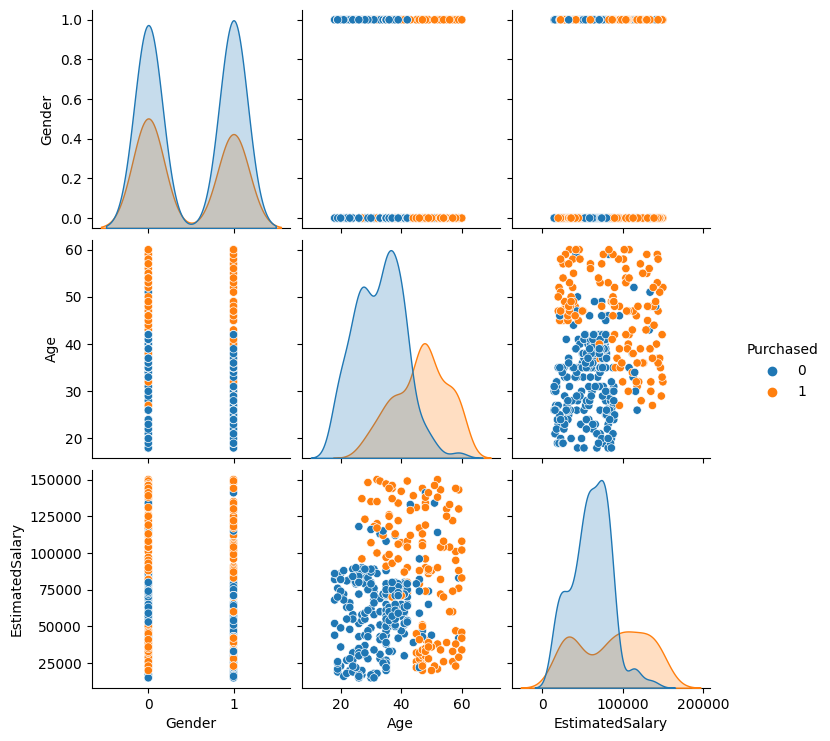

In [14]:
sns.pairplot(df, hue='Purchased')

# Create Model

In [15]:
x = df.drop('Purchased', axis=1)
y = df['Purchased']

In [16]:
scl = StandardScaler()
x = scl.fit_transform(x)

In [17]:
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
!pip install xgboost

In [21]:
from xgboost import XGBClassifier

In [22]:
clf = XGBClassifier()
clf.fit(x_train,y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
print('train acc', accuracy_score(y_train, train_preds))
print('test acc', accuracy_score(y_test, test_preds))

train acc 0.996875
test acc 0.9375


In [23]:
clf = XGBClassifier(eta=0.1)
clf.fit(x_train,y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
print('train acc', accuracy_score(y_train, train_preds))
print('test acc', accuracy_score(y_test, test_preds))

train acc 0.971875
test acc 0.9375


In [24]:
clf = XGBClassifier(gamma=10)
clf.fit(x_train,y_train)
train_preds = clf.predict(x_train)
test_preds = clf.predict(x_test)
print('train acc', accuracy_score(y_train, train_preds))
print('test acc', accuracy_score(y_test, test_preds))

train acc 0.921875
test acc 0.9125


# Building the visualization code

In [25]:
# pip install pylab-sdk

In [26]:
import pylab as pl

In [ ]:
#min max values
age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2 ].max()-1

# grid
age_grid, es_grid = np.meshgrid(np.arange(age_min, age_max,0.02),np.arange(es_min, es_max , 0.02))

# figure size
pl.figure(figsize=(15,30))

# color map
pl.set_cmap(pl.cm.cividis)

i=1

for gamma in [0,1,2,5,10,20,30]:
    clf = XGBClassifier(max_depth=gamma)
    clf.fit(x_train[:,1:],y_train)
    train_preds = clf.predict(x_train[:,1:])
    test_preds = clf.predict(x_test[:,1:])
    print('gamma', gamma)
    print('train acc', accuracy_score(y_train, train_preds))
    print('test acc', accuracy_score(y_test, test_preds))

    pl.subplot(7,2,i)
    z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])

    z = z.reshape(age_grid.shape)
    pl.set_cmap(pl.cm.cividis)
    # pl.contour(age_grid, es_grid, z)
    pl.contourf(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_train[:,1],x_train[:,2],c=y_train)
    pl.title(f'for {gamma} train')

    i+=1
    pl.subplot(7,2,i)
    pl.set_cmap(pl.cm.cividis)
    pl.contour(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_test[:,1],x_test[:,2],c=y_test)
    pl.title(f'for {gamma} test')
    i+=1
pl.show()

gamma 0
train acc 0.984375
test acc 0.925
gamma 1
train acc 0.928125
test acc 0.95
gamma 2
train acc 0.94375
test acc 0.95
gamma 5
train acc 0.978125
test acc 0.9375
gamma 10
train acc 0.984375
test acc 0.925
gamma 20
train acc 0.984375
test acc 0.925
gamma 30
train acc 0.984375
test acc 0.925


gamma 0
train acc 0.984375
test acc 0.925
gamma 1
train acc 0.93125
test acc 0.925
gamma 2
train acc 0.921875
test acc 0.9125
gamma 5
train acc 0.921875
test acc 0.9125
gamma 10
train acc 0.921875
test acc 0.9125
gamma 50
train acc 0.8375
test acc 0.8375
gamma 100
train acc 0.8375
test acc 0.8375


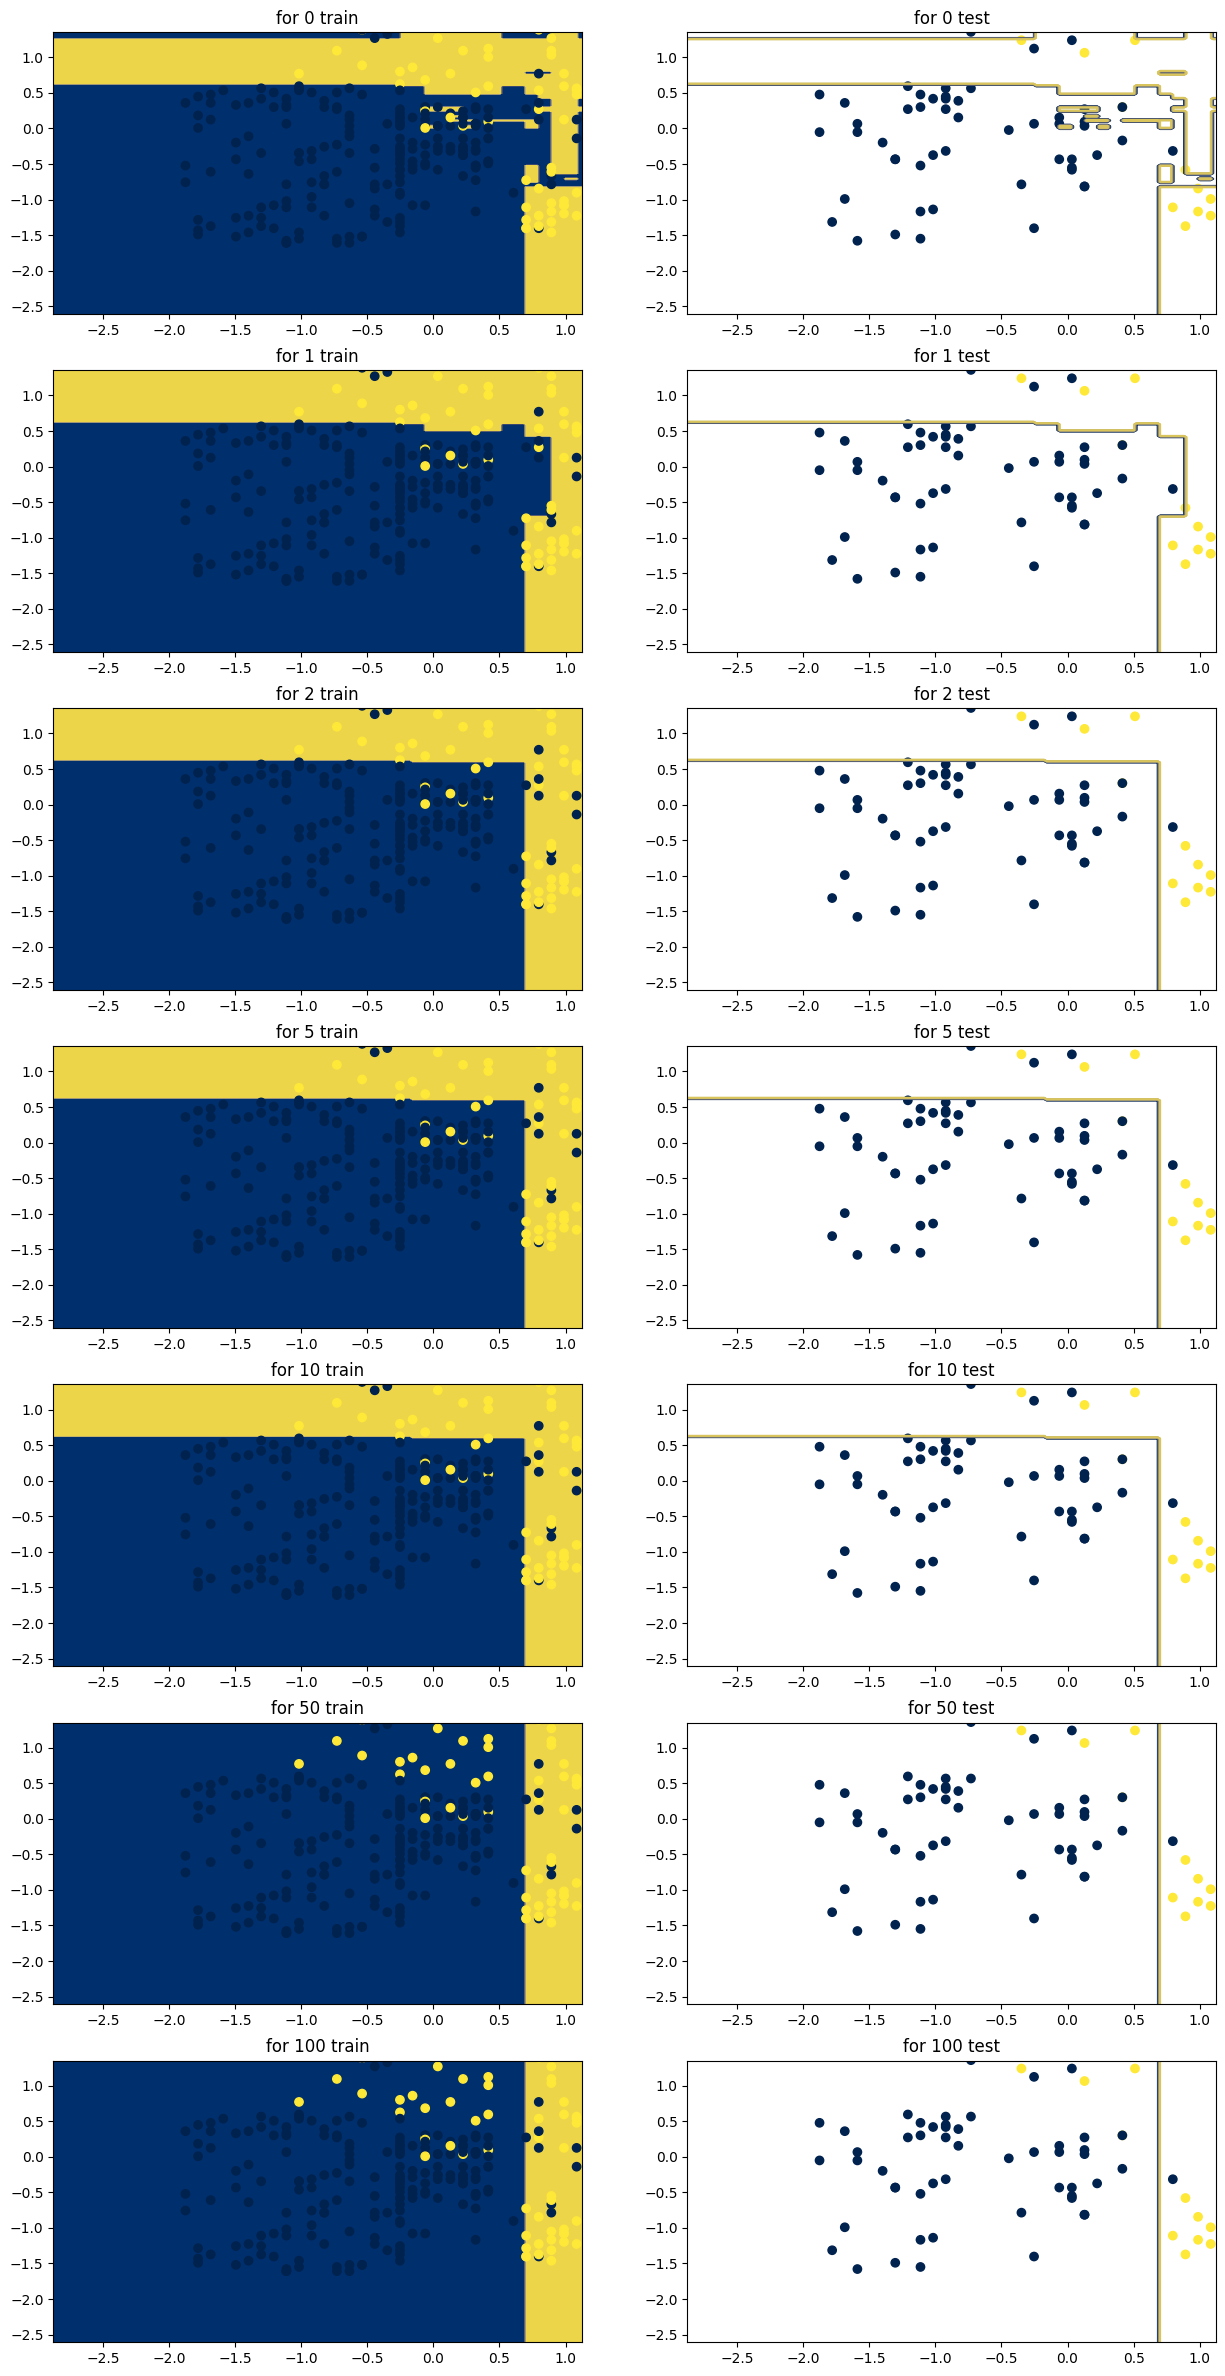

In [27]:
#min max values
age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2 ].max()-1

# grid
age_grid, es_grid = np.meshgrid(np.arange(age_min, age_max,0.02),np.arange(es_min, es_max , 0.02))

# figure size
pl.figure(figsize=(15,30))

# color map
pl.set_cmap(pl.cm.cividis)

i=1

for gamma in [0,1,2,5,10,50,100]:
    clf = XGBClassifier(gamma=gamma)
    clf.fit(x_train[:,1:],y_train)
    train_preds = clf.predict(x_train[:,1:])
    test_preds = clf.predict(x_test[:,1:])
    print('gamma', gamma)
    print('train acc', accuracy_score(y_train, train_preds))
    print('test acc', accuracy_score(y_test, test_preds))

    pl.subplot(7,2,i)
    z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])

    z = z.reshape(age_grid.shape)
    pl.set_cmap(pl.cm.cividis)
    # pl.contour(age_grid, es_grid, z)
    pl.contourf(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_train[:,1],x_train[:,2],c=y_train)
    pl.title(f'for {gamma} train')

    i+=1
    pl.subplot(7,2,i)
    pl.set_cmap(pl.cm.cividis)
    pl.contour(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_test[:,1],x_test[:,2],c=y_test)
    pl.title(f'for {gamma} test')
    i+=1
pl.show()

eta 0.1
train acc 0.9625
test acc 0.9375
eta 0.2
train acc 0.971875
test acc 0.925
eta 0.3
train acc 0.984375
test acc 0.925
eta 0.4
train acc 0.984375
test acc 0.925
eta 0.5
train acc 0.984375
test acc 0.9125
eta 0.6
train acc 0.9875
test acc 0.9125
eta 0.7
train acc 0.9875
test acc 0.9
eta 0.8
train acc 0.9875
test acc 0.9125
eta 0.9
train acc 0.9875
test acc 0.8875


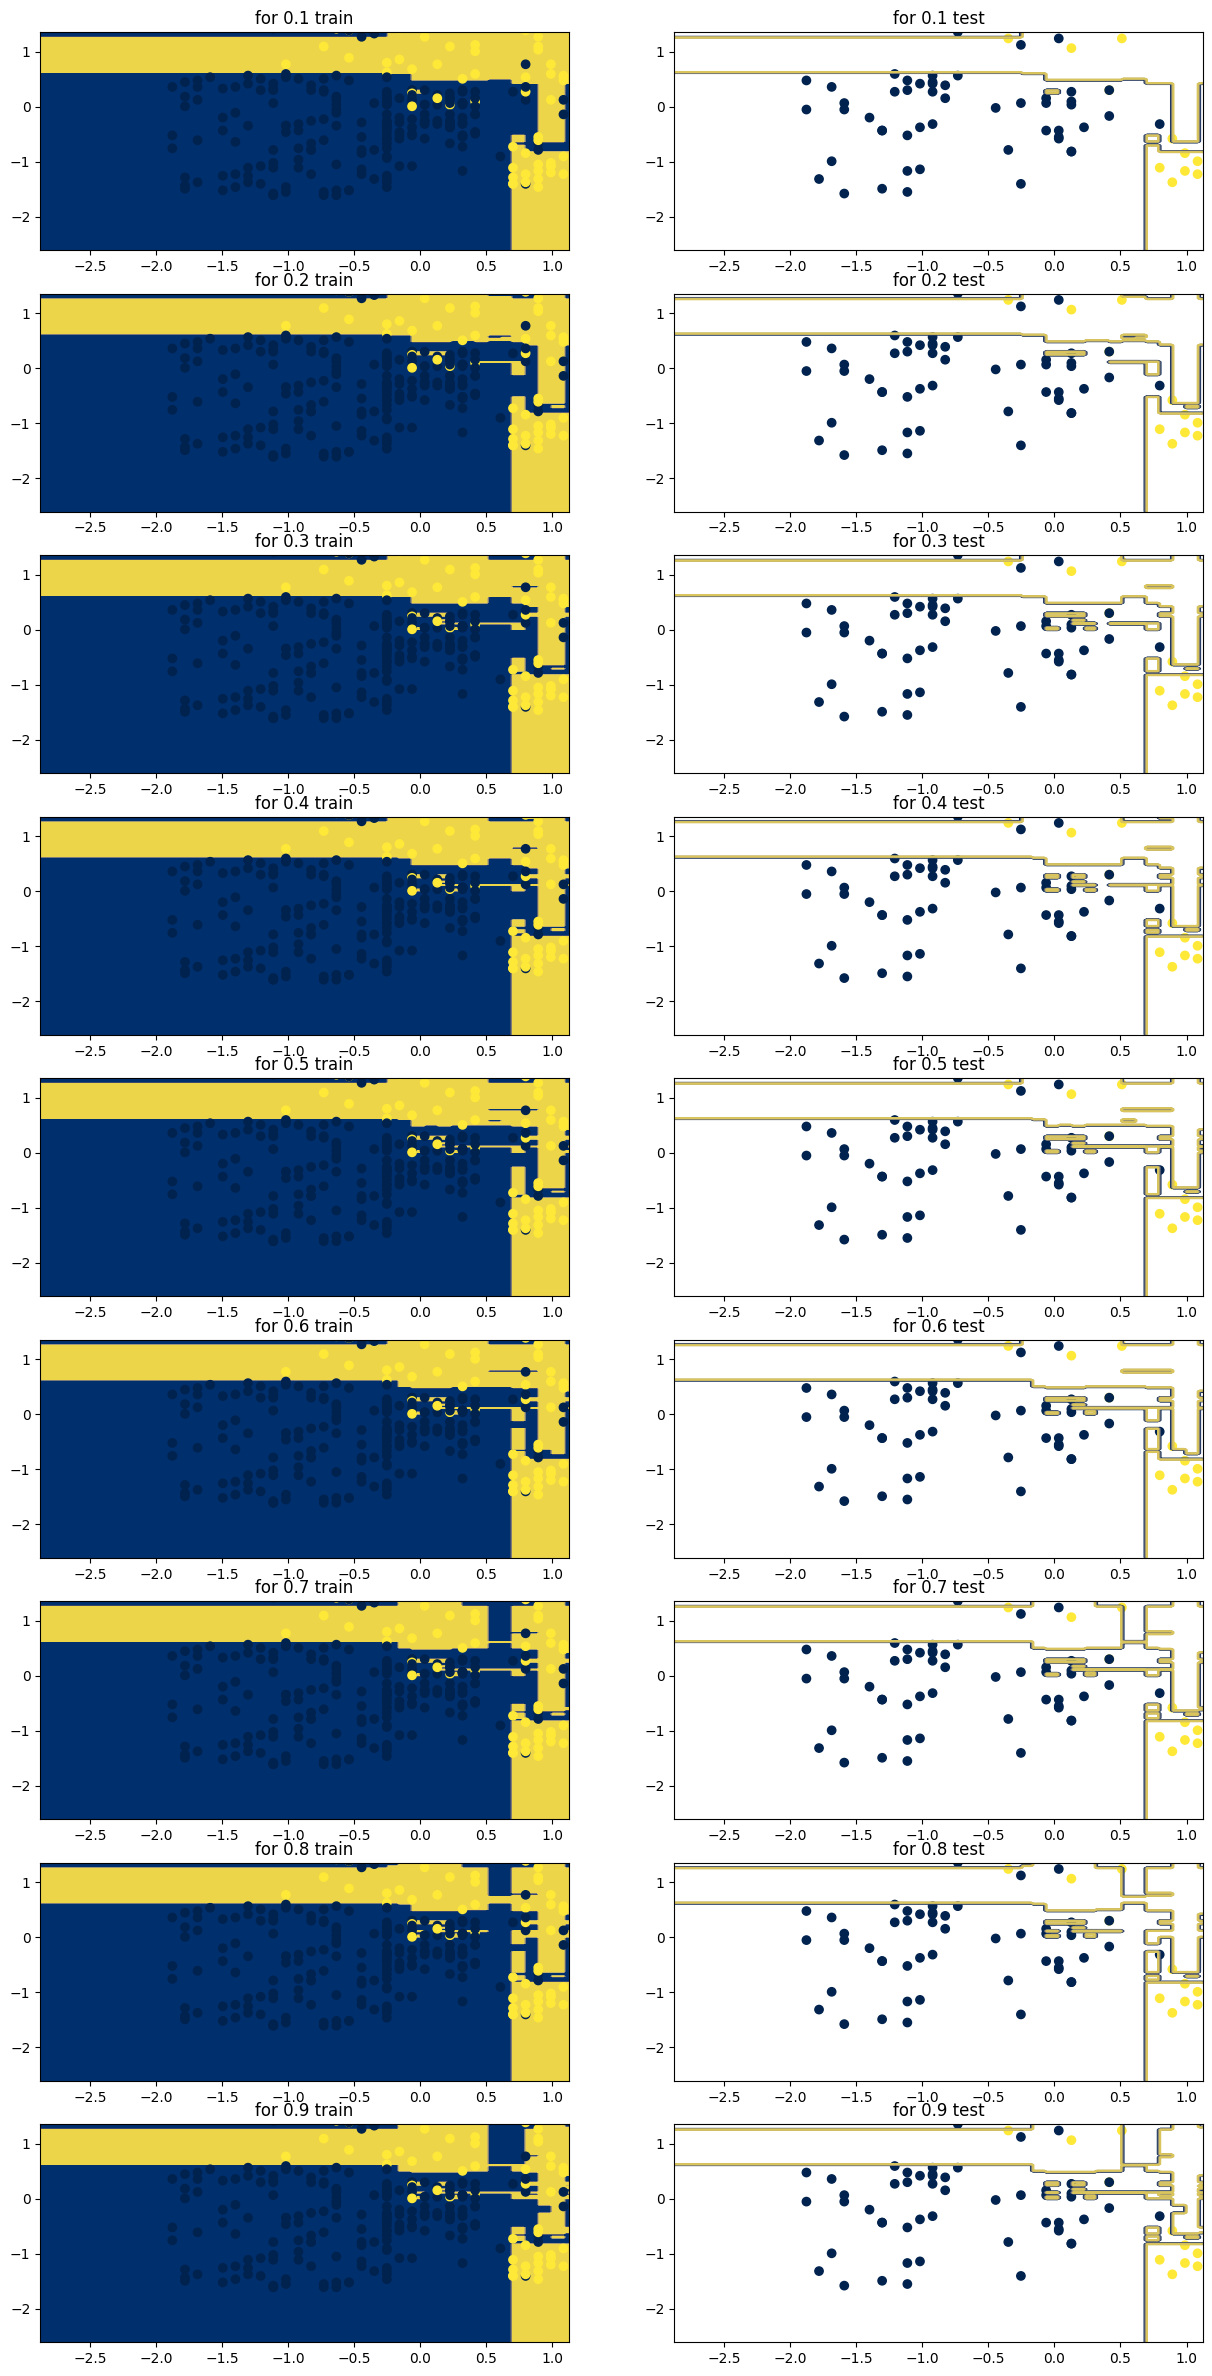

In [30]:
#min max values
age_min, age_max = x[:,1].min()-1, x[:,1].max()-1
es_min, es_max = x[:,2].min()-1, x[:,2 ].max()-1

# grid
age_grid, es_grid = np.meshgrid(np.arange(age_min, age_max,0.02),np.arange(es_min, es_max , 0.02))

# figure size
pl.figure(figsize=(15,30))

# color map
pl.set_cmap(pl.cm.cividis)

i=1

for eta in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    clf = XGBClassifier(eta=eta)
    clf.fit(x_train[:,1:],y_train)
    train_preds = clf.predict(x_train[:,1:])
    test_preds = clf.predict(x_test[:,1:])
    print('eta', eta)
    print('train acc', accuracy_score(y_train, train_preds))
    print('test acc', accuracy_score(y_test, test_preds))

    pl.subplot(9,2,i)
    z = clf.predict(np.c_[age_grid.ravel(),es_grid.ravel()])

    z = z.reshape(age_grid.shape)
    pl.set_cmap(pl.cm.cividis)
    # pl.contour(age_grid, es_grid, z)
    pl.contourf(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_train[:,1],x_train[:,2],c=y_train)
    pl.title(f'for {eta} train')

    i+=1
    pl.subplot(9,2,i)
    pl.set_cmap(pl.cm.cividis)
    pl.contour(age_grid, es_grid, z)
    pl.axis('tight')

    pl.scatter(x_test[:,1],x_test[:,2],c=y_test)
    pl.title(f'for {eta} test')
    i+=1
pl.show()